In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from modAM import demod_dsbsc_am, mod_AM_convencional, demod_AM_convecional

In [3]:
folder = 'Fig/'

In [4]:
def menssagem(amplitude, frequency):
    t = np.linspace(0, 1, 1000) 
    return amplitude * np.cos(2 * np.pi * frequency * t), t

f = 10
A = 1

m , t = menssagem(A,f)

df = pd.DataFrame( {'Tempo': t, 
                    'Amplitude(V)':m}
    )
df.set_index('Tempo')
df.to_csv(folder+'sinal_mensagem.csv')

In [5]:
def sinal_modulado(A_m , f_m, f_c):
    A_c = 1
    m , t = menssagem(A_m,f_m)
    c_t  =A_c * np.cos(2 * np.pi * f_c * t)
    
    return c_t*m , m, t

f_m = 5
A_m = 1
f_c = 100

s, m,t = sinal_modulado(A_m , f_m, f_c)


df = pd.DataFrame( {'Tempo': t, 
                    'Amplitude(V)':s,
                    'Mensagem': m}
    )
df.set_index('Tempo')
df.to_csv(folder+'sinal_am_dsbsc.csv')

    

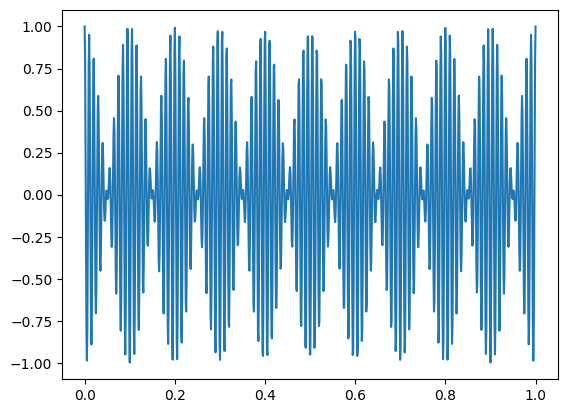

In [6]:
plt.plot(t,s)

In [7]:
def espectro_am_dsb(A_m , f_c , f_m ):
   u_t, m_t, t = sinal_modulado(A_m , f_m, f_c)
   fs = 1/(t[1] - t[0])
   U_f = np.fft.fftshift(np.fft.fft(u_t))
   f = np.linspace(-fs/2,fs/2,len(u_t))
   return U_f, f


f_m = 10
A_m = 1
f_c = 200

U_f, f = espectro_am_dsb(A_m , f_c , f_m )


df = pd.DataFrame( {'Frequencia': f, 
                    'Amplitude(V)':np.abs(U_f)/len(f)}
    )
df.set_index('Frequencia')
df.to_csv(folder+'sinal_freq_am_dsbsc.csv')

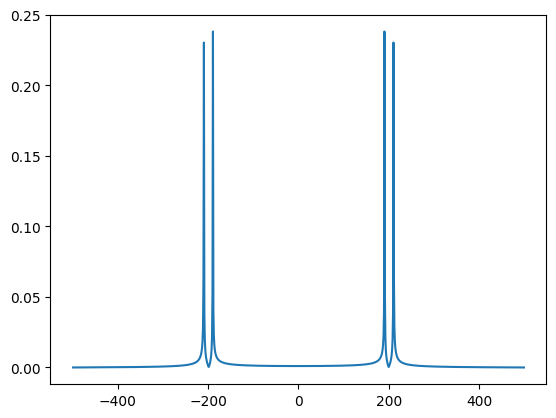

In [8]:
plt.plot(f,np.abs(U_f)/len(f))

In [9]:
f_m = 10
A_m = 1
f_c = 200

u_t, m_t, t = sinal_modulado(A_m , f_m, f_c)

u_demod = u_t * np.cos(2*np.pi*f_c*t)
U_demod_f = np.fft.fftshift(np.fft.fft(u_demod))


df = pd.DataFrame( {'Frequencia': f, 
                    'Amplitude(V)':np.abs(U_f)/len(f),
                    'Amplitude2(V)':np.abs(U_demod_f)/len(f)}
    )
df.set_index('Frequencia')
df.to_csv(folder+'sinal_freq_am_dsbsc.csv')

In [10]:
fs = 1/(t[1] - t[0])
m_hat_t, r_t = demod_dsbsc_am(u_t,t,A_c=1,fc=f_c,cutoff=1.1*f_m,fs=fs)

df = pd.DataFrame( {'Tempo': t, 
                    'Mensagem_Estimada':2*m_hat_t,
                    'Mensagem': m_t}
    )

df.to_csv(folder+'sinal_estimado.csv')

# AM Convecional

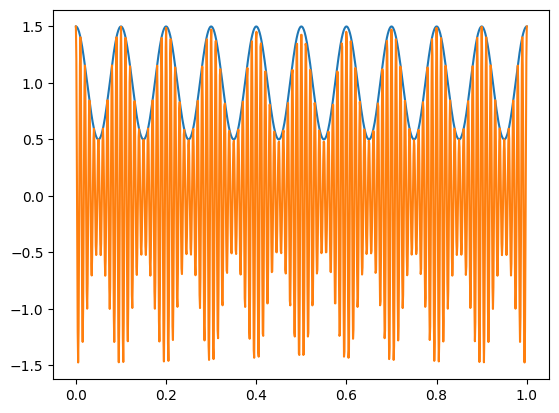

In [11]:
f_m = 10
A = 1

m , t = menssagem(A,f_m)

a = 0.5
s_t  = mod_AM_convencional(m,t,1,100,a)

df = pd.DataFrame( {'Tempo': t, 
                    'Mensagem':1 + a*m,
                    'Sinal': s_t}
    )

df.to_csv(folder+'sinal_am_convencional.csv')

plt.plot(t, 1 + a*m)
plt.plot(t,s_t)
plt.show()

In [12]:
U_f = np.fft.fftshift(np.fft.fft(s_t))
fs = 1/(t[1] - t[0])
f = np.linspace(-fs/2,fs/2,len(s_t))

df = pd.DataFrame( {'Frequencia': f, 
                    'Amplitude(V)':np.abs(U_f)/len(f)}
    )
df.set_index('Frequencia')
df.to_csv(folder+'sinal_freq_am_convencional.csv')



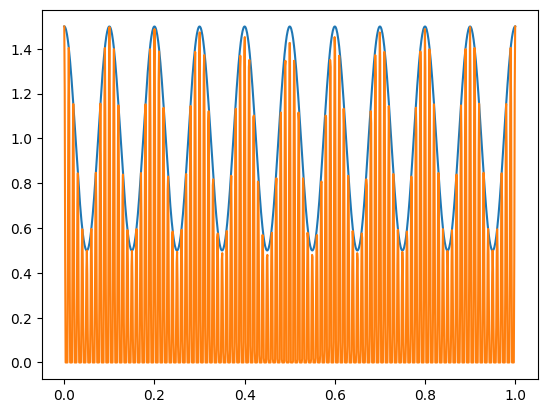

In [13]:
r_t = [s_t[i] if s_t[i] > 0 else 0  for i in range(len(t))] 

df = pd.DataFrame( {'Tempo': t, 
                    'Mensagem':1 + a*m,
                    'Sinal': s_t,
                    'Sinal_retificado':r_t}
    )

df.to_csv(folder+'sinal_am_convencional.csv')
plt.plot(t, 1 + a*m)
plt.plot(t,r_t)
plt.show()

In [14]:
R_f = np.fft.fftshift(np.fft.fft(r_t))
fs = 1/(t[1] - t[0])
f = np.linspace(-fs/2,fs/2,len(r_t))

df = pd.DataFrame( {'Frequencia': f, 
                    'Amplitude(V)':np.abs(U_f)/len(f),
                    'Amplitude(V)2':np.abs(R_f)/len(f)}
    )
df.set_index('Frequencia')
df.to_csv(folder+'sinal_freq_am_convencional.csv')

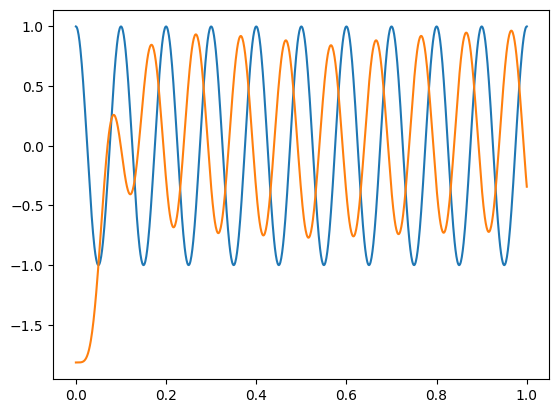

In [15]:
m_hat, r_t = demod_AM_convecional(s_t,1.1*f_m,fs)

df = pd.DataFrame( {'Tempo': t, 
                    'Mensagem':1 + a*m,
                    'Mensagem2':m,
                    'Sinal': s_t,
                    'Sinal_retificado':r_t,
                    'Mensagem_estimada':(m_hat - np.mean(m_hat))*6})

df.to_csv(folder+'sinal_am_convencional.csv')

plt.plot(t, m)
plt.plot(t,(m_hat - np.mean(m_hat))*6)
plt.show()


In [28]:
def ideal_high_pass_filter(fcut,f):
    
    Hf =[ 1 if np.abs(fi) >= fcut else 0 for fi in f ]
    
    return Hf

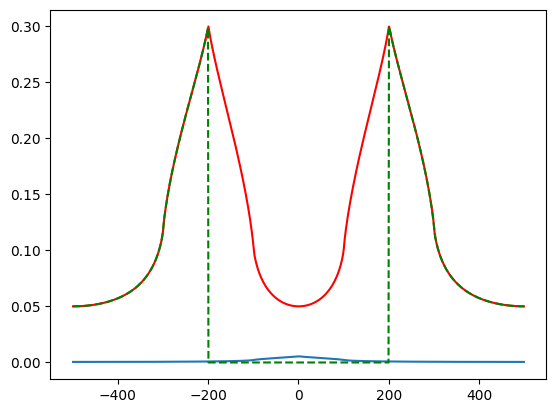

In [33]:
B = 100
m_sinc = np.sinc(B*t)**2
Mf = np.fft.fftshift(np.fft.fft(m_sinc)/len(f))

fc =200 

s_mod = m_sinc*np.cos(2*np.pi*fc*t)
Sf = np.fft.fftshift(np.fft.fft(s_mod)/len(f))

Hf = ideal_high_pass_filter(fc,f)

plt.plot(f,np.abs(Mf))
plt.plot(f,100*np.abs(Sf),'r')
plt.plot(f,100*np.abs(Hf*Sf),'--g')
plt.show()

df = pd.DataFrame({'Frequencia':f,
                   'Amplitude(V)1':100*np.abs(Sf),
                   'Amplitude(V)2':100*np.abs(Hf*Sf)})

df.to_csv(folder+'sinal_ssb.csv')